<a href="https://colab.research.google.com/github/akhil1198/RL-PA1/blob/main/RL_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gymnasium matplotlib numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 KB 9.6 MB/s eta 0:00:00


In [155]:
from google.colab import widgets
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import time

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

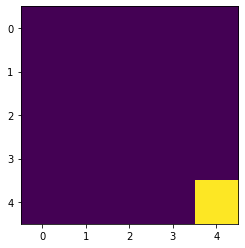

<IPython.core.display.Javascript object>

In [156]:
output_grid = widgets.Grid(1,1)

for _ in range(5):
  grid = np.zeros((5, 5))
  grid[np.random.randint(5), np.random.randint(5)] = 1

  with output_grid.output_to(0,0):
    output_grid.clear_cell()
    plt.imshow(grid)
  time.sleep(2) 

Creating an Environment with all the actions, states, rewards and positions

In [157]:
class GridEnv(gym.Env):
  def __init__(self, env_type="deterministic"):
    self.environment_width = 5
    self.environment_height = 5
    self.observation_space = spaces.Discrete(25)
    self.action_space = spaces.Discrete(4)

    self.timestep = 0
    self.max_timesteps = 10

    self.agent_pos = [0, 0]
    self.goal_pos = [4, 4]

    self.state = np.zeros((5,5))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5

    self.reward_pos = np.asarray([[0, 4], [2, 1], [3, 4], [4, 2]])
    self.negreward_pos = np.asarray([[1, 2], [3, 0], [3, 3]])

  def reset(self):
    self.state = np.zeros((5,5))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5
    observation = self.state.flatten()

    info = {}

    return observation, info
  
  def step(self, action, obs):
    if action == 0:
      self.agent_pos[0] += 1
    if action == 1:
      self.agent_pos[0] -= 1
    if action == 2:
      self.agent_pos[1] += 1
    if action == 3:
      self.agent_pos[1] -= 1

    # Comment this to demonstrate the truncation condition.
    self.agent_pos = np.clip(self.agent_pos, 0, 2)

    self.state = np.zeros((5,5))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5
    observation = self.state.flatten()

    reward = 0
    #[0, 4], [2, 1], [3, 4], [4, 2]
    if np.array_equal(self.agent_pos, self.reward_pos[0]):
      reward += 2
    if np.array_equal(self.agent_pos, self.reward_pos[1]):
      reward += 4
    if np.array_equal(self.agent_pos, self.reward_pos[2]):
      reward += 8
    if np.array_equal(self.agent_pos, self.reward_pos[3]):
      reward += 6
    
    if np.array_equal(self.agent_pos, self.goal_pos):
      reward += 100
    
    #[1, 2], [3, 0], [3, 3]
    if np.array_equal(self.agent_pos, self.negreward_pos[0]):
      reward -= 5
    if np.array_equal(self.agent_pos, self.negreward_pos[1]):
      reward -= 6
    if np.array_equal(self.agent_pos, self.negreward_pos[2]):
      reward -= 2 

    self.timestep += 1


    terminated = True if self.timestep >= self.max_timesteps else False
    truncated = True if np.all((self.agent_pos >=0 ) & (self.agent_pos <= 2)) else False

    info = {}
    
    return observation, reward, terminated, truncated, info

  def render(self):
    plt.imshow(self.state)


Creating a Random Agent 

In [158]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space
  def step(self, obs):
    return np.random.choice(self.action_space.n)
  

Starting the execution by calling all the methods in the Environment until termination of process

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

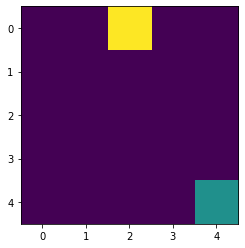

<IPython.core.display.Javascript object>

In [160]:
env = GridEnv()
agent = RandomAgent(env)

obs, info = env.reset()
terminated, truncated = False, False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

while not terminated:
  action = agent.step(obs)
  observation, reward, terminated, truncated, info = env.step(action, obs)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    plt.imshow(grid)
    env.render()
  time.sleep(1)